In [1]:
import os
import numpy as np
import h5py
import scipy.signal as ss
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import yaml


In [2]:
columns = ['Date','Plate','Well','Cell','Mutation','Transfection_date','Induction_date','Light_source',
           'Light_power','I-peak','I-peak_norm','I-steady','I-steady_norm','External','Internal']

In [3]:
# dataPaths = {'563.1':['/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0045_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0046_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0047_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0048_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0049_000'],
             
#              '565.1':['/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0001_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0005_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0007_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0008_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0009_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0010_000'],
             
#              '566.1':['/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_002/patch_attempt_0035_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_002/patch_attempt_0036_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_002/patch_attempt_0037_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_002/patch_attempt_0038_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_002/patch_attempt_0039_000']            
#             } 

In [4]:
# data_all={}
# for param in columns:
#     data_all[param] = []
# for k,v in dataPaths.items():
#     for cell in v:
#         data_all['Date'].append('200924')
#         if k == '563.1':
#             data_all['Plate'].append('plate_003')
#         elif k == '565.1':
#             data_all['Plate'].append('plate_000')
#         else:
#             data_all['Plate'].append('plate_002')
#         data_all['Well'].append('Well_1')
#         data_all['Cell'].append(cell[-22:])
#         data_all['Mutation'].append(k)
#         data_all['Transfection_date'].append('200923')
#         data_all['Induction_date'].append('200922')
#         data_all['External'].append('Na+')
#         data_all['Internal'].append('K+')
#         if k == '563.1':
#             data_all['Light_source'].append('510/25')
#             data_all['Light_power'].append('40%')
#         else:
#             data_all['Light_source'].append('575/25')
#             data_all['Light_power'].append('30%')
#         I_peak_single_trial = []
#         I_peak_single_trial_norm = []

#         for trial in range(4):
#             dataFile = cell + '/opto_stim_clamp1_000/' + str(trial).zfill(3) + '/Clamp1.ma'
#             data = h5py.File(dataFile,'r')
#             iv_data = data['data'][()]
#             trace = iv_data[1,:]
#             trace = trace*1e9
#             b, a = ss.butter(1, 0.125)
#             y = ss.filtfilt(b, a, trace, padlen=125)
#             y = ss.medfilt(y, kernel_size = 15)
#             if trial==0:
#                 I_peak_80 = np.mean(y[40400:40600]) - np.mean(y[36000:37000])
#             I_peak = np.mean(y[40400:40600]) - np.mean(y[36000:37000])
#             I_peak_norm = -I_peak/I_peak_80
#             I_peak_single_trial.append(I_peak)
#             I_peak_single_trial_norm.append(I_peak_norm)
#         data_all['I-peak'].append(I_peak_single_trial)
#         data_all['I-peak_norm'].append(I_peak_single_trial_norm)
# print('done!')


In [5]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
datePath = ['2021.06.30_000']
bad_trials = []

### For 10 ms stimuli data

In [6]:
# data_all={}
# for param in(columns):
#     data_all[param] = []
    
# for date in datePath:
#     platePath = pb.getPathInfo(os.path.join(dataPath, date))
    
#     for plate in platePath:
#         idxFile = os.path.join(dataPath, date, plate, '.index')
#         a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
#         mutation = a['.']['mutation_1']
#         print(mutation)
#         cellPath = pb.getPathInfo(os.path.join(dataPath, date, plate))
        
#         for cell in(cellPath):
#             if not os.path.exists(os.path.join(dataPath,date,plate,cell,'opto_stim_clamp1_1s_000')):
#                 print(cell)
#                 continue
#             if cell in (bad_trials):
#                 continue
#             data_all['Date'].append(date)
#             data_all['Plate'].append(plate)
#             data_all['Well'].append('Well_1')
#             data_all['Cell'].append(cell)
#             data_all['Mutation'].append(mutation)
#             data_all['Transfection_date'].append('201128')
#             data_all['Induction_date'].append('201129')
#             data_all['External'].append('Na+')
#             data_all['Internal'].append('K+')
# #             if mutation != '572.1':
# #                 data_all['Light_source'].append('575/25')
# #             else:
# #                 data_all['Light_source'].append('470/24')
#             data_all['Light_source'].append('575/25 (Teal)')
#             data_all['Light_power'].append('20%')
#             I_peak_single_trial = []
#             I_peak_single_trial_norm = []

#             for trial in range(6):
#                 dataFile = os.path.join(dataPath,date,plate,cell,'opto_stim_clamp1_1s_000',str(trial).zfill(3),'Clamp1.ma')
#                 if not os.path.exists(dataFile):
#                     continue
#                 data = h5py.File(dataFile,'r')
#                 iv_data = data['data'][()]
#                 trace = iv_data[1,:]
#                 trace = trace*1e9
#                 b, a = ss.butter(1, 0.125)
#                 y = ss.filtfilt(b, a, trace, padlen=125)
#                 y = ss.medfilt(y, kernel_size = 15)
#                 if trial==0:
#                     I_peak_80 = np.mean(y[40400:40600]) - np.mean(y[36000:37000])
#                 I_peak = np.mean(y[40400:40600]) - np.mean(y[36000:37000])
#                 I_peak_norm = -I_peak/I_peak_80
#                 I_peak_single_trial.append(I_peak)
#                 I_peak_single_trial_norm.append(I_peak_norm)
#             data_all['I-peak'].append(I_peak_single_trial)
#             data_all['I-peak_norm'].append(I_peak_single_trial_norm)
# print('done!')


### For 1 s stimuli data

In [8]:
data_all={}
for param in(columns):
    data_all[param] = []
    
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(dataPath, date))
    
    for plate in platePath:
        idxFile = os.path.join(dataPath, date, plate, '.index')
        a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        mutation = a['.']['mutation_1']
        print(mutation)
        cellPath = pb.getPathInfo(os.path.join(dataPath, date, plate))
        
        for cell in(cellPath):
            if not os.path.exists(os.path.join(dataPath,date,plate,cell,'opto_stim_clamp1_1s_000')):
                print(cell)
                continue
            if cell in (bad_trials):
                continue
            data_all['Date'].append(date)
            data_all['Plate'].append(plate)
            data_all['Well'].append('Well_1')
            data_all['Cell'].append(cell)
            data_all['Mutation'].append(mutation)
            data_all['Transfection_date'].append('201128')
            data_all['Induction_date'].append('201129')
            data_all['External'].append('Na+')
            data_all['Internal'].append('K+')
#             if mutation != '572.1':
#                 data_all['Light_source'].append('575/25')
#             else:
#                 data_all['Light_source'].append('470/24')
            data_all['Light_source'].append('575/25 (Teal)')
            data_all['Light_power'].append('20%')
            I_peak_single_trial = []
            I_peak_single_trial_norm = []
            I_steady_single_trial = []
            I_steady_single_trial_norm = []
            
            for trial in range(7):
                dataFile = os.path.join(dataPath,date,plate,cell,'opto_stim_clamp1_1s_000',str(trial).zfill(3),'Clamp1.ma')
                if not os.path.exists(dataFile):
                    continue
                data = h5py.File(dataFile,'r')
                iv_data = data['data'][()]
                trace = iv_data[1,:]
                trace = trace*1e9
                b, a = ss.butter(1, 0.125)
                y = ss.filtfilt(b, a, trace, padlen=125)
                y = ss.medfilt(y, kernel_size = 15)
                if trial==0:
                    I_peak_80 = np.min(y[19000:22000])-np.min(y[19000:19500])
                    I_steady_80 = np.min(y[58000:58500])-np.min(y[19000:19500])
                if trial<2:
                    I_peak = np.min(y[19000:22000])-np.min(y[19000:19500])
                    I_steady = np.min(y[58000:58500])-np.min(y[19000:19500])
                else:
                    I_peak = np.max(y[19000:22000])-np.max(y[19000:19500])
                    I_steady = np.max(y[58000:58500])-np.max(y[19000:19500])
                I_peak_norm = -I_peak/I_peak_80
                I_steady_norm = -I_steady/I_steady_80
                
                I_peak_single_trial.append(I_peak)
                I_peak_single_trial_norm.append(I_peak_norm)
                
                I_steady_single_trial.append(I_steady)
                I_steady_single_trial_norm.append(I_steady_norm)
                
                
            data_all['I-peak'].append(I_peak_single_trial)
            data_all['I-peak_norm'].append(I_peak_single_trial_norm)
            
            data_all['I-steady'].append(I_steady_single_trial)
            data_all['I-steady_norm'].append(I_steady_single_trial_norm)
            
            
            
print('done!')


631.1
patch_attempt_0000_000
patch_attempt_0001_000
patch_attempt_0004_000
patch_attempt_0010_000
632.1
patch_attempt_0022_000
patch_attempt_0026_000
done!


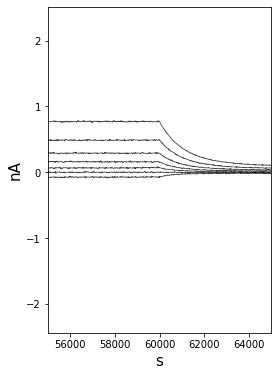

In [9]:
plate = 'plate_001'
# cell = 'patch_attempt_0001_000'
cell = 'patch_attempt_0021_000'
plt.figure(figsize=[4,6])
ax = plt.subplot(111)
x = np.linspace(0,1.5,60000)
for i in range(7):
    dataFile = os.path.join(dataPath,date,plate,cell,'opto_stim_clamp1_1s_000',str(i).zfill(3),'Clamp1.ma')
#     dataFile = os.path.join(dataPath,date,plate,cell,'opto_stim_clamp1_1s_000','000','Clamp1.ma')
    data = h5py.File(dataFile,'r')
    iv_data = data['data'][()]
    trace = iv_data[1,:]
    trace = trace*1e9
    b, a = ss.butter(1, 0.125)
    y = ss.filtfilt(b, a, trace, padlen=125)
    y = ss.medfilt(y, kernel_size = 15)
#     ax.plot(x,y[10000:70000],color='k',lw=0.75,alpha=0.75)
    ax.plot(y,color='k',lw=0.75,alpha=0.75)

ax.set_xlabel('s',size=15)
ax.set_ylabel('nA',size=15)
    # plt.plot(y)
    # plt.ylim([-0.4,0.3])
    # plt.xlim([19000,22000])
plt.xlim([55000,65000])
# plt.savefig('/Users/zhengj10/Desktop/210707/632.1_current_trace.png')
plt.
plt.show()


In [10]:
df_new = pd.DataFrame(data_all)
df_new
# df = df.append(df_new, ignore_index = True)
# df.index = np.arange(len(df))
# df.shape


,Date,Plate,Well,Cell,Mutation,Transfection_date,Induction_date,Light_source,Light_power,I-peak,I-peak_norm,I-steady,I-steady_norm,External,Internal
0,2021.06.30_000,plate_000,Well_1,patch_attempt_0002_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.08309761848986592, -0.005100790416083658, ...","[-1.0, -0.06138311192041826, 0.232184585638903...","[-0.004353304202749916, -0.004935347097520986,...","[-1.0, -1.1337014064864572, 3.127210531352728,...",Na+,K+
1,2021.06.30_000,plate_000,Well_1,patch_attempt_0003_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.023914282177783186, -0.0016712513147814712...","[-1.0, -0.06988507128740393, 0.635829606835881...","[-0.0065585162002719435, -0.006749555547526229...","[-1.0, -1.0291284402478664, 2.0414651916887614...",Na+,K+
2,2021.06.30_000,plate_000,Well_1,patch_attempt_0005_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.03612816189320918, -0.006309717095256365, ...","[-1.0, -0.1746481626689779, 0.7362760923075014...","[-0.006020489687809702, 0.0015977026270909411,...","[-1.0, 0.265377520756488, 3.4763644146310977, ...",Na+,K+
3,2021.06.30_000,plate_000,Well_1,patch_attempt_0006_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.12892571540497225, -0.00381838393915336, 0...","[-1.0, -0.029616930394059285, 0.09792111261185...","[-0.006950899341872589, -0.0026478827983571684...","[-1.0, -0.38094103627802245, 1.589839802755513...",Na+,K+
4,2021.06.30_000,plate_000,Well_1,patch_attempt_0007_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.18177096403517137, -0.004345900557550308, ...","[-1.0, -0.023908662093630132, 0.14569112250907...","[-0.016399094396028543, -0.0002114470732901847...","[-1.0, -0.012893826218927795, 0.60934608287932...",Na+,K+
5,2021.06.30_000,plate_000,Well_1,patch_attempt_0008_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.6054862374235201, -0.029479745752445476, 0...","[-1.0, -0.048687722247640855, 0.03771119733182...","[-0.04569951904039006, -0.01064100475144859, 0...","[-1.0, -0.23284719346923274, 0.507449947626018...",Na+,K+
6,2021.06.30_000,plate_000,Well_1,patch_attempt_0009_000,631.1,201128,201129,575/25 (Teal),20%,"[-1.1136114114332683, -0.12454507041177472, 0....","[-1.0, -0.11183889562650906, 0.005060890667030...","[-0.12633633755897847, -0.06235549695585449, 0...","[-1.0, -0.4935673944698978, 0.0173201059625686...",Na+,K+
7,2021.06.30_000,plate_000,Well_1,patch_attempt_0011_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.4961886012534824, -0.010528816607929458, 0...","[-1.0, -0.021219384285191826, 0.06843256452365...","[-0.034596537067386135, -0.005991303364120586,...","[-1.0, -0.17317638908341892, 0.630987089816577...",Na+,K+
8,2021.06.30_000,plate_000,Well_1,patch_attempt_0012_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.37430785842359593, -0.02462512877920054, 0...","[-1.0, -0.06578843651028247, 0.019404711035660...","[-0.03253725488303544, -0.022133018168731068, ...","[-1.0, -0.6802361861286269, -0.050495753161695...",Na+,K+
9,2021.06.30_000,plate_000,Well_1,patch_attempt_0013_000,631.1,201128,201129,575/25 (Teal),20%,"[-0.32923156126433295, -0.017047835392566595, ...","[-1.0, -0.051780683866086745, 0.08218600102153...","[-0.02615414093238555, -0.0028259155078629323,...","[-1.0, -0.10804849278623113, 0.706893460669279...",Na+,K+


In [ ]:
# for k,v in data_all.items():
#     print(k,len(v))

In [12]:
df = df_new

In [ ]:
# df = pd.DataFrame(data_all)
# df


In [ ]:
mutation = '573.1'
df[df.Mutation == mutation]

In [ ]:
df = pd.read_pickle('/Users/zhengj10/Desktop/GENIE/Data/S2 cell/S2_cell_summary.pkl')

In [ ]:
df.to_excel('/Users/zhengj10/Desktop/S2_cell_summary.xlsx',index=False)
df.to_pickle('/Users/zhengj10/Desktop/S2_cell_summary.pkl')

In [14]:
# df.Mutation.unique()

labels_dict = {
    '563.1':'59D.1-ChR2 ET/TC',
    '565.1':'vLong Neurexin-CsChrimson',
    '566.1':'vShort Neurexin-CsChrimson',
    '605.1':'CsChrimson w/o leader',
    '571.1':'59D.1-CsChrimson',
    '572.1':'59D.1-ChIEF',
    '573.1':'59D.1-ChRmine',
    '631.1':'pRmHa3_A1ACR1_EYFP_GD_Dm_opt',
    '632.1':'pRmHa3_HfACR1_EYFP_GD_Dm_opt'
}


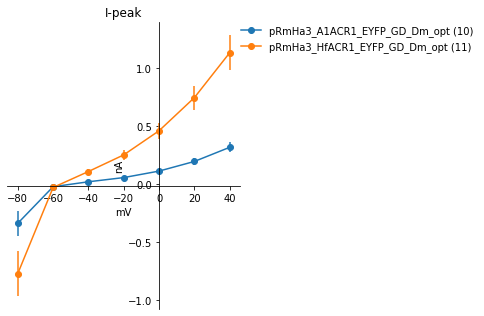

In [26]:
# sensors = df.Mutation.unique()
# sensors = ['605.1','565.1','566.1','563.1','571.1','572.1','573.1']
# sensors = ['605.1','565.1','571.1','572.1','573.1']
# sensors = ['605.1','565.1','571.1']

sensors = ['631.1','632.1']

param = 'I-peak'
# param = 'I-peak_norm'
# fig = plt.figure(figsize=[3.8,4.5])

# if param == 'I-peak_norm':
#     fig = plt.figure(figsize=[4,4])
if param == 'I-peak':
    fig = plt.figure(figsize=[8.5,4.5]) # To plot legend (use plt.tight_layout() as well)

ax = plt.subplot(111)
# colors = {'565.1':'#ff7f0e','566.1':'#2ca02c'}
for sensor in sensors:
    if param =='I-peak_norm' and sensor in(['563.1','572.1']):
        continue
    df_sensor = df[df.Mutation==sensor]
    param_mean = np.nanmean(df_sensor[param].tolist(), axis=0)
    param_sem = np.nanstd(df_sensor[param].tolist(), axis=0)/np.sqrt((len(df_sensor)-1))
    x = np.linspace(-80,40,7)
#     ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-',label = sensor +' (%d)' %len(df_sensor),
#                color = colors[sensor])
    ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-',label = labels_dict[sensor] +' (%d)' %len(df_sensor))
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', -0.02))

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlabel('mV')
    if param =='I-peak_norm':
        ax.set_ylabel('I-norm')
    else:
        ax.set_ylabel('nA')
#     ax.xaxis.set_label_coords(1.03, 0.63)
#     ax.yaxis.set_label_coords(0.72, 0.05)
    if param == 'I-peak':
        handles, labels = ax.get_legend_handles_labels() 
        handles = [h[0] for h in handles]
        ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.5, 1.02),frameon=False)
ax.set_title('I-peak')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/S2 cell/'+param+'_all.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/210707/'+param+'_all.png') # For legend onlyS2|
plt.show()


### Example traces:
#### 2020.09.24_000 experiment:
- plate_000: 0008 (largest current)
- plate_002: 0039 (largest current)

In [ ]:
# ['/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0001_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0005_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0007_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0008_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0009_000',
#                       '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0010_000']

In [ ]:
dataPath = '/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_000/patch_attempt_0008_000/opto_stim_clamp1_000/'
# data_path = os.path.join(dataPath,date,'plate_003','patch_attempt_0025_000','opto_stim_clamp1_000')
os.path.exists(dataPath)


#### Plot all voltage in one figure

In [ ]:
fig = plt.figure(figsize=[4,2])
for trial in range(4):
    ax = plt.subplot(1,4,trial+1)

    dataFile = os.path.join(data_path,str(trial).zfill(3),'Clamp1.ma')
    data = h5py.File(dataFile,'r')
    meta = data['data'][()]
    trace = meta[1,:]
    trace = trace*1e9
    b, a = ss.butter(1, 0.125)
    y = ss.filtfilt(b, a, trace, padlen=125)
#     y = trace
    y = ss.medfilt(y, kernel_size = 15)
#     ax = plt.subplot(5,1,trial+1)
#     ax.set_ylim([-12e-1,7e-1])
#     ax.set_ylim([-19e-1,8e-1])


    


    ax.plot(y[37000:55000],color='k',alpha=0.6)
    ax.set_ylim([-1.6793978271240113, 0.6797621388133532])
    ax.axis('off')
#     if trial==3:
#         ax.plot([4000,12000,12000],[-1,-1,-0.5],color='k',alpha=0.6) # plot scale bar
# print(np.mean(y[40400:40600])) # peak current value
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/S2 cell/' + mutation + '_current_traces.pdf',format='pdf')
plt.show()


#### Plot each voltage manually

In [ ]:
fig = plt.figure(figsize=[1,2])

ax = plt.subplot(111)

dataFile = data_path + '/003/Clamp1.ma'
data = h5py.File(dataFile,'r')
meta = data['data'][()]
trace = meta[1,:]
trace = trace*1e9
b, a = ss.butter(1, 0.125)
y = ss.filtfilt(b, a, trace, padlen=125)
y = ss.medfilt(y, kernel_size = 15)
# ax.set_ylim([-19e-1,7e-1])
ax.set_ylim([-1.6793978271240113, 0.6797621388133532])
ax.axis('off')

ax.plot(y[37000:55000],color='k',alpha=0.6)
# ax.plot([8000,16000,16000],[-1.6,-1.6,-1.1],color='k',alpha=0.6)
# print(np.mean(y[40400:40600])) # peak current value
fig.savefig('/Users/zhengj10/Desktop/S2 cell/571.1_40mV.pdf',format='pdf')
plt.show()


In [ ]:
ax.get_ylim()

In [ ]:
df.to_pickle('/Users/zhengj10/Desktop/S2 cell/summary_201124.pkl')

#### Cell images (RL and TL)
- RL images only available when imaging and stimulation light is the same)

In [ ]:
import tifffile as tff

In [ ]:
imgFile = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0042_000/fluor_image_000.tif'

In [ ]:
imgFile = tff.TiffFile(imgFile)
imgFile = imgFile.asarray()

In [ ]:
plt.imshow(imgFile[206:306,206:306],vmin=np.min(imgFile),vmax=np.max(imgFile),cmap='gray')
plt.plot([75,90.38],[90,90],color='w',lw=3)
plt.axis('off')
plt.savefig('/Users/zhengj10/Desktop/S2 cell/fluor_image.png')
# 